<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/LS_DS_Uni_4_Sprint_3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!
model = Sequential()
model.add(Embedding(max_features, 132))
model.add(LSTM(132, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [0]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 3s 1ms/sample - loss: nan - acc: 0.0387
Test score: nan
Test accuracy: 0.03873553


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Please add your answer in markdown here.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Please add your answer in markdown here.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Please add your answer in markdown here.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 7.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=da6fd0a34526b1bc464376051c3d67564248ce677f3fc9f97f4a1cf0c06734a6
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg
Completed Image ====> 1.frog-lily-pond-2-b.jpg
Image URL: https://cdn.pixabay.com/photo/2017/07/14/17/44/frog-2504507_960_720.jpg
Completed Image ====> 2.frog-2504507_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 3.Frog-on-lily-pad.jpg
Image URL: https://i.pinimg.com/originals/9a/49/08/9a49083d4d7458a194a451eea757a444.jpg
Completed Image ====> 4.9a49083d4d7458a194a451eea757a444.jpg
Image URL: https://s3.amazonaws.com/assets.cce.cornell.edu/slides/22531/image/sized/Ponds5.jpg?1437939118
Completed Image ====> 5.Ponds5.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features)[0]
    
    contains_frog = False
    labels = ['bullfrog', 'tree_frog', 'tailed_frog']
    predictions = {'bullfrog': 0.0, 'tree frog': 0.0, 'tailed frog': 0.0}
    for result in results:
      if result[1] == 'bullfrog':
        predictions['bullfrog'] = result[2]
      if result[1] == 'tree_frog':
        predictions['tree frog'] = result[2]
      if result[1] == 'tailed_frog':
        predictions['tailed frog'] = result[2]
    return predictions

In [0]:
img_paths = absolute_image_paths[0]['lilly frog pond']

frog_predictions = {'bullfrog': [], 'tree frog': [], 'tailed frog': []}
for path in img_paths:
  img = process_img_path(path)
  frogs = img_contains_frog(img)
  frog_predictions['bullfrog'].append(frogs['bullfrog'])
  frog_predictions['tree frog'].append(frogs['tree frog'])
  frog_predictions['tailed frog'].append(frogs['tailed frog'])
print(frogs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
{'bullfrog': 0.0, 'tree frog': 0.0, 'tailed frog': 0.0}


In [0]:
print(frog_predictions)

{'bullfrog': [0.045519695, 0.35860497, 0.0, 0.0, 0.0], 'tree frog': [0.0, 0.07753513, 0.0, 0.01435911, 0.0], 'tailed frog': [0.0, 0.30636418, 0.0, 0.0, 0.0]}


#### Stretch Goal: Displaying Predictions

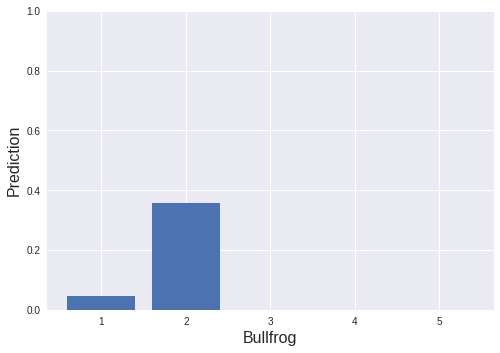

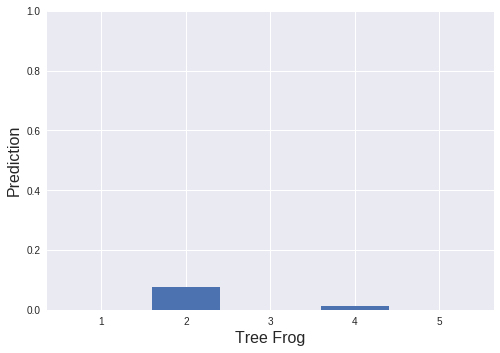

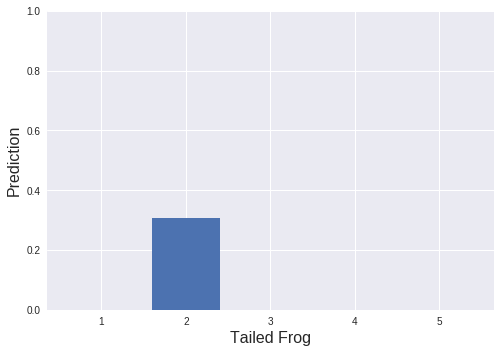

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
images = [1, 2, 3, 4, 5]

plt.bar(images, frog_predictions['bullfrog'])
plt.xlabel('Bullfrog', size = 16)
plt.ylabel('Prediction', size=16)
plt.ylim((0.0, 1.0))
plt.show()
plt.bar(images, frog_predictions['tree frog'])
plt.xlabel('Tree Frog', size = 16)
plt.ylabel('Prediction', size=16)
plt.ylim((0.0, 1.0))
plt.show()
plt.bar(images, frog_predictions['tailed frog'])
plt.xlabel('Tailed Frog', size = 16)
plt.ylabel('Prediction', size=16)
plt.ylim((0.0, 1.0))
plt.show()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ One use case for an autoencoder would be to reconstruct a corrupted image. Autoencoders are unsupervised neural networks that focus on reconstructing its input instead of trying to predict an output.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.



*   As a Data Scientist, my strongest area is turning data into a format that is easier to understand. Some data might be missing or may be in a different kind of format. I'm strong in handeling those kinds of data entries to make it easier for other people to understand.
*   I would like to learn more about Hyperparameter tuning and data visualizations. Hyperparameters to see how small changes can change a prediction. Visualizations to see what other ways are there to display data.
* I'm worried people may eventually become too dependent on AI and end up trusting their decisions, even if they don't completely agree with them.
* I don't believe it is possible to map a complete General Artificial Intelligence. Some AI might be stronger than others, but I believe the thought process of the human brain is difficult to completely computerize. Some poeple think much differently than others, some people might think of one conclusion while someone else might think of another.



## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")